# The Titanic - Learning from Disaster

In this project, I'll be taking on the famous Titanic Dataset. In contains information about the passengers on board, and wether they survived or not. This Dataset is part of a Competition hosted by Kaggle.com and all information about it can be found [here](https://www.kaggle.com/c/titanic).

I'll try to follow the Machine Learning Project Checklist of the book by Geron: Hands on Machine Learning (2nd edition) to guarantee a structured approach to this project. The goal will be an actual submission to the competition on kaggle.com

There are 2 datasets available, one with training data, one with testing data. The Test Set does not contain the labels, so results can only be extracted from making a submission to kaggle.com.


Before we have a look at our checklist, let's import some common modules:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Frame the problem and look at the big picture
1. Define the objective in business terms
    - In this case, our business is concerned with predicting wether a passenger survived the Titanic disaster or not.


2. How will your solution be used?
    - Our solution/model will be used to make a submission to a competition on kaggle.com


3. What are the current solutions/workarounds (if any)?
    - 


4. How should you frame this problem?
    - We'll have ti implement a supervised learning model. It wil be an offline system (not constantlay learning from new information)


5. How should performance be measured?
    - Performance will be measured via Accuracy.


6. Is the performance measure aligned with the business objective
    - Yes, since our goal is to get as many right predictions as possible.


7. What would be the minimum performance needed to rach the business objective
    - A realistic goal we will set now is a performance of 85%.


8. What are comparable problems? Can you reuse experience or tools?
    - Checkpoint does no apply to this problem


9. Is human expertise available
    - No


10. How would you solve the problem manually?
    - Do some data analysis on the dataset, find promising correlations and try to make predictions using the intuition that can be gained from the analysis.


11. List the assumptions you have made so far.
    - We assume that there is indeed a relationship between the survival rate and the features of a specific passenger.
    - No other assumptions are made until this point.

## Get the data
1. List the data you need and how much you need.
    - The data can be found via the link at the top of this project. Since there is only little data available, we'll need all of it
    
2. Find and document where you can get the data.
    - as in 1.

3. Check how much space it will take.
    - only important for larger datasets

4. Check legal obligations, and get authorization if necessary.
    - not applicable to this project
   
5. Get access authorization.
    - not applicable to this project
   
6. Create a workspace with enough storage space.
    - We did that by creating the folder of this project and the Jupyter notebook.
    
7. Get the data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Explore the data
1. Create a copy of the data for exploration.

In [3]:
explo = train

In [4]:
explo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Before we further explore the dataset, let's change the column names to snake_case.

In [5]:
explo.columns = ["passenger_id", "survived", "pclass", "name", "sex", "age", "sib_sp", "par_ch", "ticket", "fare", "cabin", "embarked"]

In [6]:
explo.describe(include="all")

,passenger_id,survived,pclass,name,sex,age,sib_sp,par_ch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Navratil, Master. Edmond Roger",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
explo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passenger_id    891 non-null int64
survived        891 non-null int64
pclass          891 non-null int64
name            891 non-null object
sex             891 non-null object
age             714 non-null float64
sib_sp          891 non-null int64
par_ch          891 non-null int64
ticket          891 non-null object
fare            891 non-null float64
cabin           204 non-null object
embarked        889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We'll add the data description here also:

* survival: 0 if not survived, 1 if survived
* passenger_id: Unique Id for each passenger
* pclass: Ticket class from 1(lowest) to 3(highest)
* name: Name of the passenger
* sex: Sex
* age: Age of passenger in years
* sib_sp: # of siblings / spouses aboard the Titanic
* par_ch: # of parents / children aboard the Titanic
* ticket: Ticket number under which the passenger boarded the ship
* fare: Fare of the corresponding ticket
* cabin: Cabin number
* embarked: Port of embarkation

First notes about the data:
1. There are many missing values for the "cabin" feature. We will drop this feature, since there seems to be no logical way to impute this column.

In [8]:
explo = explo.drop("cabin", axis = 1)

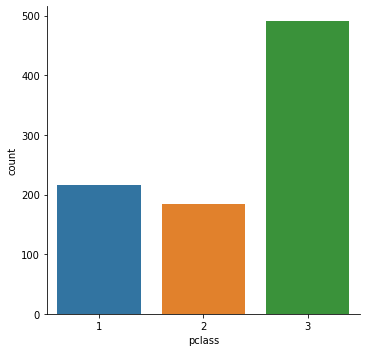

In [9]:
sns.catplot(x = "pclass", kind = "count", data = explo)

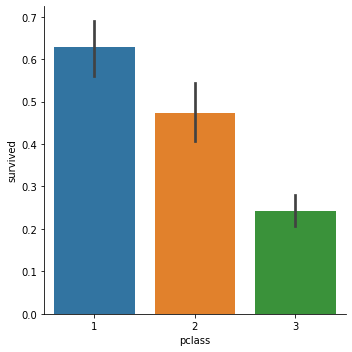

In [10]:
sns.catplot(x = "pclass", y = "survived", kind = "bar", data = explo)

The third class counts just as much passengers as the first and second class combined.
The third class has a much lower survival rate then the second or first class.
Let's find out, if the "fare" feature tells the same story.

In [11]:
explo["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

It would make sense, to group the fare feature for our analysis.

In [12]:
explo["fare_cat"] = pd.cut(explo["fare"], [0, 10, 20, 30 ,50, 75, 100, 150, 200, 500], include_lowest = True, labels = False)

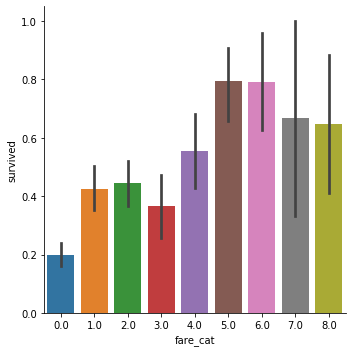

In [13]:
sns.catplot(x = "fare_cat", y = "survived", kind = "bar", data = explo)

The "fare" and "fare_cat" feature confirm our analysis from before. Richer people in higher classes have a greater chance to survive.

Another interesting thing might be to look at what people of different classes paid for their tickets:

In [14]:
explo_p1 = explo[explo["pclass"] == 1]
explo_p2 = explo[explo["pclass"] == 2]
explo_p3 = explo[explo["pclass"] == 3]

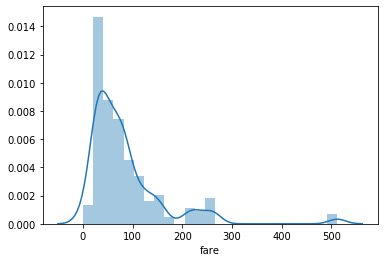

In [15]:
#fare distribution in class 1
sns.distplot(explo_p1["fare"])

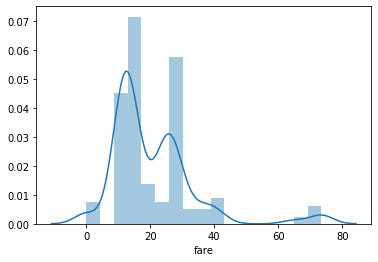

In [16]:
# fare distribution in class 2
sns.distplot(explo_p2["fare"])

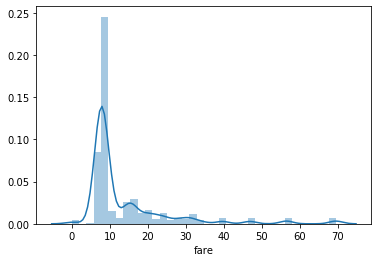

In [17]:
# fare distribution in class 3
sns.distplot(explo_p3["fare"])

For some reason, there are passengers of the third class, that paid more than the average second class passenger. Why is that? Let's use the "Ticket" feature, to see if many people travelled under one ticket.

In [18]:
explo_p3["ticket"].value_counts()

CA. 2343    7
1601        7
347082      7
347088      6
3101295     6
           ..
345572      1
4579        1
364851      1
349234      1
3101264     1
Name: ticket, Length: 394, dtype: int64

We can see, that some ticket numbers belong to several passengers. Thus it would make sense to calculate the fare per passenger rather than keep the fare feature alone.

In [23]:
# the code below finds person groups which share the same tickets and 
# devides the ticket fare by the number of people in the group
explo['fare_corr'] = explo['fare'].copy()

m=0 # m=0 -> print first iteration as example how the code works
for grp, grp_df in explo[['ticket', 'name', 'pclass', 'fare', 'passenger_id']].groupby(['ticket']):

    if (len(grp_df) != 1):
        if m==0:
            print(grp_df)
            m=1
        for ind, row in grp_df.iterrows():
            passID = row['passenger_id']
            explo.loc[explo['passenger_id'] == passID, 'fare_corr'] = explo['fare'][explo['passenger_id'] == passID]/len(grp_df)


     ticket                                               name  pclass  fare  \
257  110152                               Cherry, Miss. Gladys       1  86.5   
504  110152                              Maioni, Miss. Roberta       1  86.5   
759  110152  Rothes, the Countess. of (Lucy Noel Martha Dye...       1  86.5   

     passenger_id  
257           258  
504           505  
759           760  


In [24]:
explo_p1 = explo[explo["pclass"] == 1]
explo_p2 = explo[explo["pclass"] == 2]
explo_p3 = explo[explo["pclass"] == 3]

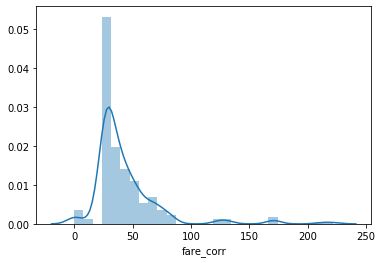

In [26]:
#fare distribution in class 1
sns.distplot(explo_p1["fare_corr"])

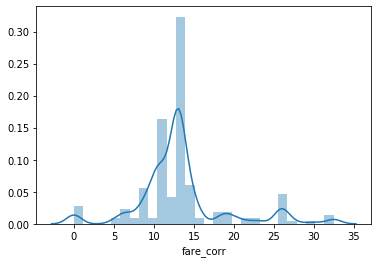

In [27]:
#fare distribution in class 2
sns.distplot(explo_p2["fare_corr"])

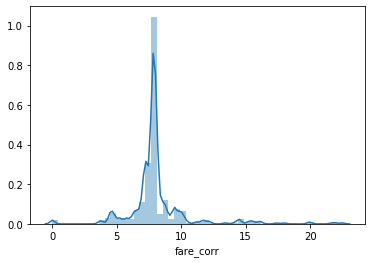

In [28]:
#fare distribution in class 3
sns.distplot(explo_p3["fare_corr"])

Let's have a look at the "embarked" feature next:

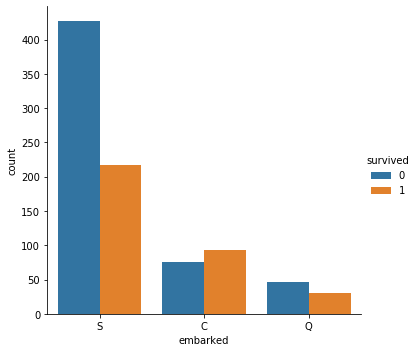

In [29]:
sns.catplot(x = "embarked", hue = "survived", data = explo, kind = "count")

Survival rate is much better when embarking from S. Could this be explained by who is embarking there?

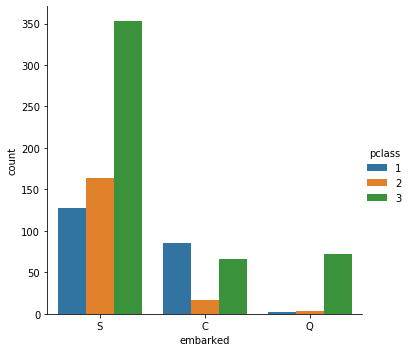

In [30]:
sns.catplot(x = "embarked", hue="pclass", data = explo, kind = "count")

Most first and second class passengers did indeed embark in S, but also a very large number of third class passengers.

Let's check, how Sex effects the chance of survival: